In [1]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
import os

In [2]:
os.listdir('../datasets/')

['media_transition_matrix.csv',
 'results-20200325-102921.csv',
 'transition_matrix.csv',
 'results-20200306-160842.csv',
 'results-20200302-192534.csv',
 'results-20200312-120025.csv',
 'media_attribution_user_path.csv',
 'bq-results-20200316-103331-x64m8yjo2mxi.csv',
 'bq-results-20200316-095008-suz5t1dsc692.csv',
 'Bq_Res_Jan_May.csv',
 'm_a_user_path_sample.csv']

In [3]:
# df=pd.read_csv('../datasets/'+'media_attribution_user_path.csv')
df=pd.read_csv('../datasets/'+'m_a_user_path_sample.csv')
# df=df[df['medium']!='START']
TM=pd.read_csv('../datasets/'+'transition_matrix.csv')
df=df.drop('Unnamed: 0',axis=1)
print(df.head())
print(df.shape)
# df.sample(10000).to_csv('../datasets/m_a_user_path_sample')

client_id    agg_sessions
0  v8724695574823262183  cpc,cpc,cpc:-1
1  v4737328201566511742   (none),cpc:-1
2  v9197784259673868369          cpc:-1
3  v8329729553352482688          cpc:-1
4  v7412691913245693675        em,em:-1
(10000, 2)


In [4]:
df.shape

(10000, 2)

In [5]:
TM

,next_medium,(none),(not set),25136670062_2-,25221790062_1-,25222060062_1-,25565290062_2-,25736130062_2-,25736300062_2-,25779930062_1-,...,site,siteoficial,skechers_coop,skechers_coop_caras,sm,social,stories,video,xml,zalo
0,(none),2011174,83,0,0,0,0,0,0,0,...,0,0,0,0,58,0,0,0,0,0
1,(not set),7677,116398,0,0,0,0,0,0,0,...,0,0,0,0,92,0,0,0,0,0
2,25136670062_2-,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25221790062_1-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25222060062_1-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,social,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
123,stories,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
124,video,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,xml,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,21,0


In [6]:
idx=df['agg_sessions'].apply(len).sort_values(ascending=False).index[0]
df['agg_sessions'][idx]

're,cpc,cpc,cpc,cpc:343.44;em,organic,re,re,re,re,re,re,re,re,re,re:298.74;re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,cpc,cpc,cpc,cpc,cpc,cpc,cpc,cpc,re,cpc,cpc,cpc,cpc,cpc,cpc,cpc,cpc,cpc,cpc,cpc,cpc,fd,fd,fd:593.5;fd,fd,fd,fd,fd,fd:224.95;fd,fd,fd,fd,fd,fd,fd,cpc,cpc,re,re,re,re,re,re,re,re,re,re,re,re,re,re,re,cpc,fd,fd,fd,fd,fd,re,fd,fd,fd,cpc,organic,cpc,organic,cpc,organic,cpc,cpc,cpc,organic,organic,cpc,cpc:79.99;cpc,organic,cpc,cpc,organic,cpc,organic,cpc,cpc,cpc,cpc,cpc,cpc,cpc,cpc,cpc,cpc,cpc,fd,cpc,(none),cpc,cpc,cpc,(none),(none),cpc,(none),(none),(none),cpc,cpc,cpc,cpc,cpc,cpc,cpc,cpc:114.99;cpc,cpc:-1'

In [7]:
df2=df['agg_sessions'].str.split(';').explode().reset_index()
df2['path']=df2['agg_sessions'].str.split(':').apply(lambda x: x[0])
df2['values']=df2['agg_sessions'].str.split(':').apply(lambda x: x[1])
df2

,index,agg_sessions,path,values
0,0,"cpc,cpc,cpc:-1","cpc,cpc,cpc",-1
1,1,"(none),cpc:-1","(none),cpc",-1
2,2,cpc:-1,cpc,-1
3,3,cpc:-1,cpc,-1
4,4,"em,em:-1","em,em",-1
...,...,...,...,...
10314,9995,"cpc,organic,cpc,cpc:-1","cpc,organic,cpc,cpc",-1
10315,9996,(none):-1,(none),-1
10316,9997,"dp,sm,sm,dp:99","dp,sm,sm,dp",99
10317,9998,dp:-1,dp,-1


In [8]:
df2=df2[df2['path'].str.split(',').apply(len)>1]
df2

,index,agg_sessions,path,values
0,0,"cpc,cpc,cpc:-1","cpc,cpc,cpc",-1
1,1,"(none),cpc:-1","(none),cpc",-1
4,4,"em,em:-1","em,em",-1
8,8,"cpc,organic,cpc,organic,cpc:-1","cpc,organic,cpc,organic,cpc",-1
9,9,"dp,dp,dp,dp,dp,dp,dp,dp:-1","dp,dp,dp,dp,dp,dp,dp,dp",-1
...,...,...,...,...
10308,9989,"cpc,cpc,cpc:-1","cpc,cpc,cpc",-1
10312,9993,"re,re,re,re,em,em,em,em,em,em,em,em,em,em,em:-1","re,re,re,re,em,em,em,em,em,em,em,em,em,em,em",-1
10314,9995,"cpc,organic,cpc,cpc:-1","cpc,organic,cpc,cpc",-1
10316,9997,"dp,sm,sm,dp:99","dp,sm,sm,dp",99


In [9]:
ch_num_dict={}
# for ii,elem in enumerate(list(df2['path'].str.split(',').explode().unique())):
for ii,elem in enumerate(list(TM.columns)):
    ch_num_dict[elem]=ii
ch_num_dict

{'next_medium': 0,
 '(none)': 1,
 '(not set)': 2,
 '25136670062_2-': 3,
 '25221790062_1-': 4,
 '25222060062_1-': 5,
 '25565290062_2-': 6,
 '25736130062_2-': 7,
 '25736300062_2-': 8,
 '25779930062_1-': 9,
 '25783560062_1-': 10,
 '25838010062_2-': 11,
 '310140062_2-': 12,
 '3Dem': 13,
 '5715530062_2-': 14,
 '8110062_2-': 15,
 'AdVendorPage': 16,
 'Ads': 17,
 'Affiliates': 18,
 'Afiliados': 19,
 'AmigãoSecreto': 20,
 'Branding': 21,
 'CRM': 22,
 'Card': 23,
 'DP': 24,
 'DPA': 25,
 'Facebook.post': 26,
 'Fullbanner': 27,
 'Influenciadora': 28,
 'Instagram.post': 29,
 'MOCHILA DE VIAGEM': 30,
 'MOCHILETE': 31,
 'MacOfertas': 32,
 'NECESSAIRES': 33,
 'OCUPOM': 34,
 'PASTA ENVELOPE': 35,
 'PASTA EXECUTIVO': 36,
 'Parcerias': 37,
 'Post': 38,
 'Richmedia': 39,
 'START': 40,
 'Social': 41,
 'Social Media': 42,
 'SocialMedia': 43,
 'Store_Locator': 44,
 'WL2-25351120062_2-': 45,
 'WL2-25351670062_2-': 46,
 'WL2-25352430062_2-': 47,
 'af': 48,
 'af,af': 49,
 'affiliates': 50,
 'afiliados': 51,
 '

In [317]:
arr=np.zeros((df2.shape[0],))
a=0
for list_item in df2['path'].str.split(',').to_list():
    arr_l=[]
    for elem in list_item:
        arr_l.append(ch_num_dict[elem])
    arr[a,:]=np.array(arr_l)
    a=a+1
    # arr=np.row_stack(arr)
arr.shape

IndexError: too many indices for array

In [219]:
df2['fact']=0
fact_tuple=df2['path'].factorize()
fact_tuple
a=0
for path_type in fact_tuple[1]:
    df2['fact'][df2['path']==path_type]=fact_tuple[0][a]
    a=a+1
df2

,index,agg_sessions,path,values,path2,fact
0,0,"cpc,cpc,cpc:-1","cpc,cpc,cpc",-1,"cpc,cpc,cpc",0
1,1,"(none),cpc:-1","(none),cpc",-1,"(none),cpc",1
4,4,"em,em:-1","em,em",-1,"em,em",2
8,8,"cpc,organic,cpc,organic,cpc:-1","cpc,organic,cpc,organic,cpc",-1,"cpc,organic,cpc,organic,cpc",3
9,9,"dp,dp,dp,dp,dp,dp,dp,dp:-1","dp,dp,dp,dp,dp,dp,dp,dp",-1,"dp,dp,dp,dp,dp,dp,dp,dp",4
...,...,...,...,...,...,...
10308,9989,"cpc,cpc,cpc:-1","cpc,cpc,cpc",-1,"cpc,cpc,cpc",0
10312,9993,"re,re,re,re,em,em,em,em,em,em,em,em,em,em,em:-1","re,re,re,re,em,em,em,em,em,em,em,em,em,em,em",-1,"re,re,re,re,em,em,em,em,em,em,em,em,em,em,em",396
10314,9995,"cpc,organic,cpc,cpc:-1","cpc,organic,cpc,cpc",-1,"cpc,organic,cpc,cpc",12
10316,9997,"dp,sm,sm,dp:99","dp,sm,sm,dp",99,"dp,sm,sm,dp",389


In [226]:
df2['path'][df2['values'].astype(float)>0].value_counts()

cpc,cpc                                          14
cpc,cpc,cpc                                      10
cpc,cpc,cpc,cpc                                   8
dp,dp                                             6
cpc,cpc,cpc,cpc,cpc,cpc,cpc                       5
                                                 ..
cpc,organic,organic,cpc,organic,cpc,cpc,af,af     1
re,re,re,re                                       1
cpc,cpc,dp,dp                                     1
re,re,re,re,cpc,cpc,cpc                           1
af,af,af,em                                       1
Name: path, Length: 229, dtype: int64

In [253]:
arr=df2['fact'].values
arr=arr.reshape(-1,1)
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
model = hmm.MultinomialHMM(n_components=4).fit(arr)
hidden_states=model.predict(arr)

In [254]:
df2['hs']=hidden_states
df2['hs'][df2['values'].astype(float)>0].value_counts()

1    121
0     72
2     55
3     47
Name: hs, dtype: int64

In [255]:
model.transmat_

array([[0.29470081, 0.26114551, 0.19982337, 0.24433031],
       [0.28084395, 0.2615377 , 0.20566082, 0.25195753],
       [0.30707228, 0.25111257, 0.22313354, 0.21868161],
       [0.28537081, 0.26179635, 0.21014789, 0.24268496]])

# Old part of code

In [55]:
media=df['medium'].unique()
TM_media=TM['next_medium'].unique()
print(media)
print(TM_media)


['(none)' 'af' 'cpc' 'organic' 'dp' 'sm' 'em' 'CRM' 'fb-trade' 're'
 'referral' '(not set)' 'fb' 'fd' 'app' 'Social' 'xml' 'zalo' 'pa'
 'deeplink_generator' 'Instagram.post' 'br']
['(none)' '(not set)' '25136670062_2-' '25221790062_1-' '25222060062_1-'
 '25565290062_2-' '25736130062_2-' '25736300062_2-' '25779930062_1-'
 '25783560062_1-' '25838010062_2-' '310140062_2-' '3Dem' '5715530062_2-'
 '8110062_2-' 'AdVendorPage' 'Ads' 'Affiliates' 'Afiliados'
 'AmigãoSecreto' 'Branding' 'CRM' 'Card' 'DP' 'DPA' 'Facebook.post'
 'Fullbanner' 'Influenciadora' 'Instagram.post' 'MOCHILA DE VIAGEM'
 'MOCHILETE' 'MacOfertas' 'NECESSAIRES' 'OCUPOM' 'PASTA ENVELOPE'
 'PASTA EXECUTIVO' 'Parcerias' 'Post' 'Richmedia' 'START' 'Social'
 'Social Media' 'SocialMedia' 'Store_Locator' 'WL2-25351120062_2-'
 'WL2-25351670062_2-' 'WL2-25352430062_2-' 'af' 'af,af' 'affiliates'
 'afiliados' 'aft' 'app' 'banner_b2b' 'blog' 'blog_VanDuarte'
 'botao_materia' 'br' 'card' 'carnaval' 'carrinho' 'cashback' 'catalogo'
 'clo

In [82]:
list_of_non_important_channels=list(set(TM_media).difference(set(media)))
TM=TM.set_index('next_medium')
for channel in list_of_non_important_channels:
    TM=TM.drop(channel,axis=0).drop(channel,axis=1)
TM.shape

(22, 22)

In [84]:
transition_matrix=TM.values
startprob = np.array([1.0, 0.0, 0.0, 0.0])

In [24]:
df_path=df_s.groupby(['fvid','conv_group'])['medium'].apply(list).to_frame()
df_path['is_conversion']=df_s.groupby(['fvid','conv_group'])['is_conversion'].apply(lambda x: any(x==1))
df_path['length']=df_path['medium'].apply(lambda x: len(x))
df_path['length'].value_counts()

1     33989
2      5353
3      1623
4       652
5       342
6       157
7        88
8        51
9        30
10       29
11       16
12       13
13        8
16        7
15        5
19        5
14        4
30        2
17        2
18        2
25        1
45        1
78        1
20        1
21        1
34        1
23        1
24        1
32        1
Name: length, dtype: int64

In [25]:
# cv_idx=df[df['next_medium']=='conversion'].index
# ex_idx=df[df['next_medium']=='exit'].index

In [32]:
# df_path=df_path[df_path['length']>1]
# df_path.shape
df_path[df_path['is_conversion']==True]

,,medium,is_conversion,length
fvid,conv_group,,,
1.395946e+16,0,"[cpc, cpc, cpc]",True,3
1.001848e+17,0,"[organic, organic, organic, organic]",True,4
1.161667e+17,0,"[cpc, organic, organic, cpc]",True,4
1.167175e+17,0,"[cpc, cpc]",True,2
1.175697e+17,1,"[cpc, cpc]",True,2
...,...,...,...,...
1.666754e+18,0,"[cpc, cpc, cpc, cpc, cpc, cpc]",True,6
1.668220e+18,0,"[cpc, cpc]",True,2
1.669374e+18,0,"[organic, organic, (not set)]",True,3


In [18]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
covars = .5 * np.tile(np.identity(2), (4, 1, 1))
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars


GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=4, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

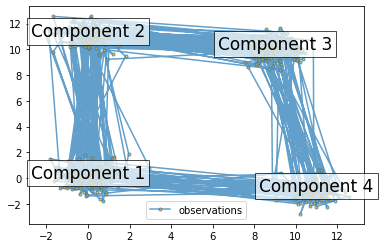

In [20]:
import matplotlib.pyplot as plt
# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()